meta NOT subset; don't know how to subset; dropped


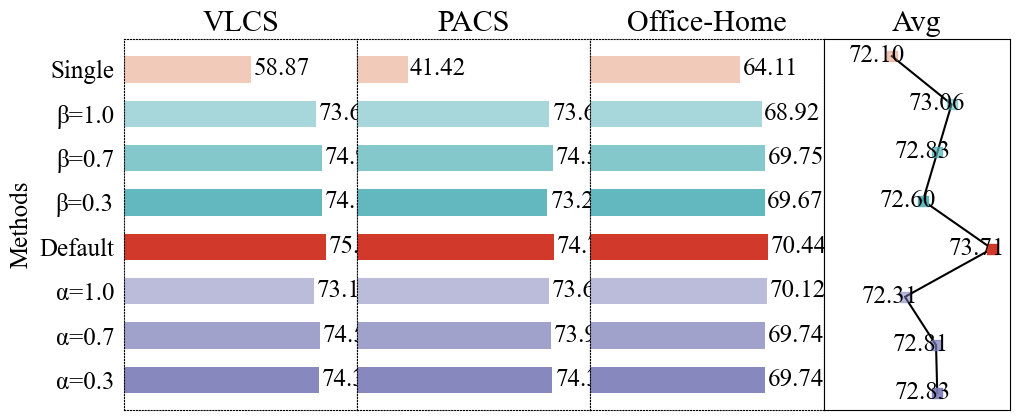

In [80]:
from matplotlib import pyplot as plt, rcParams
import matplotlib.font_manager as fm
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
config = {
    "font.family": 'serif',  # 衬线字体
    "font.size": 18,  # 相当于小四大小
    "font.serif": ['Times New Roman'],
    "mathtext.fontset": 'stix',  # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False  # 处理负号，即-号
}
rcParams.update(config)

# 为了统一起见+color
fontST = fm.FontProperties(family='SimSun',size=12)
# fontticks = fm.FontProperties(family='Times New Roman',size=22)



# Data
datasets = ['VLCS', 'PACS', 'Office-Home']
methods = [
    "Single", "β=1.0",
    "β=0.7", "β=0.3", "Default",
    "α=1.0", "α=0.7", "α=0.3"
]
data = {
    'VLCS': [58.87, 73.67, 74.93, 74.88, 75.90, 73.19, 74.59, 74.38],
    'PACS': [41.42, 73.69, 74.51, 73.24, 74.79, 73.61, 73.94, 74.37],
    'Office-Home': [64.11, 68.92, 69.75, 69.67, 70.44, 70.12, 69.74, 69.74]
}
avg = [72.10, 73.06, 72.83, 72.60, 73.71, 72.31, 72.81, 72.83]
colors = ['#e07b54', '#51b1b7', '#51b1b7', '#51b1b7', '#d1392b', '#797bb7', '#797bb7', '#797bb7']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 1, 1, 0.8]})

alpha = [0.4, 0.5, 0.7, 0.9, 1, 0.5, 0.7, 0.9]
# Horizontal bar charts
for idx, dataset in enumerate(datasets):
    for i, m in enumerate(methods):
        axes[idx].barh(m, data[dataset][i], color=colors[i], height=0.6, alpha=alpha[i])
    axes[idx].set_title(dataset)

    # axes[idx].spines['right'].set_color('blue')
    # axes[idx].spines['top'].set_color('none')
    # axes[idx].spines['left'].set_linewidth(5)
    axes[idx].spines['left'].set_linestyle(':')
    axes[idx].spines['right'].set_linestyle(':')
    axes[idx].spines['top'].set_linestyle(':')
    axes[idx].spines['bottom'].set_linestyle(':')

    # axes[idx].set_yticklabels(methods, rotation=45, ha='right')
    axes[idx].set_xlim(30, 83)
    axes[idx].xaxis.set_visible(False)
    axes[idx].tick_params(bottom=False)  # Hide y-ticks
    axes[idx].invert_yaxis()  # Invert y-axis
    for i, v in enumerate(data[dataset]):
        axes[idx].text(v + 0.5, i, f'{v:.2f}', va='center')
    axes[idx].tick_params(left=False)  # Hide y-ticks
        
    if idx > 0:
        axes[idx].yaxis.set_visible(False)  # Hide y-axis

# Line chart
sizes = [10, 20, 30, 40, 50, 40, 30, 20]  # 标记大小列表
axes[3].plot(avg, methods, color='black', linestyle='-', label='Avg')
for i, v in enumerate(avg):
    axes[3].text(v - 0.7, i, f'{v:.2f}', va='center')
axes[3].set_title('Avg')
axes[3].invert_yaxis()
axes[3].set_xlim(71, 74)
axes[3].xaxis.set_visible(False)  # Hide y-axis for the line chart
axes[3].yaxis.set_visible(False)  # Hide y-axis for the line chart
axes[3].tick_params(left=False)  # Hide y-ticks
axes[3].tick_params(bottom=False)  # Hide y-ticks
for j, a in enumerate(avg):
    axes[3].scatter(a, methods[j], marker='s', color=colors[j], label='Scatter Data', s=60, alpha=alpha[j], zorder=2)
# Common y-axis label for the first subplot only
axes[0].set_ylabel('Methods')

plt.subplots_adjust(wspace=-1)  # Adjust horizontal space between subplots

fig.tight_layout(pad=0)
plt.savefig("b.pdf", dpi=300, bbox_inches='tight')
plt.show()



C:\Users\maowenjie\AppData\Local\Temp\ipykernel_45696\121348937.py:68: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=0)
meta NOT subset; don't know how to subset; dropped


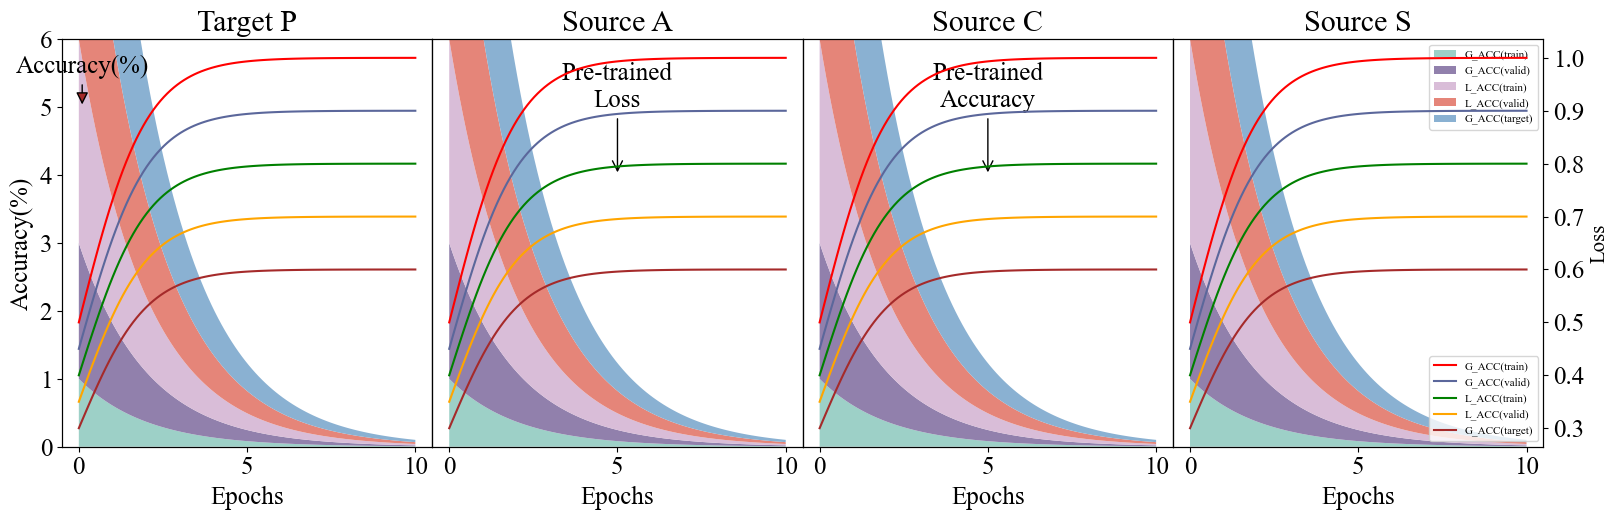

In [81]:
# import matplotlib.pyplot as plt
# import numpy as np

# 创建数据
x = np.linspace(0, 10, 100)

# 设置颜色和标签
colors2 = ['red', '#5B679B', 'green', 'orange', 'brown']
colors = ["#9dd0c7", "#9180ac", "#D9bdd8", "#e58579", "#8ab1d2"]
labels = [
    'G_ACC(train)', 'G_ACC(valid)', 'L_ACC(train)', 'L_ACC(valid)',
    'G_ACC(target)'
]
titles = ['Target P', 'Source A', 'Source C', 'Source S']

# 创建子图
fig, axs = plt.subplots(1, 4, figsize=(16, 5), constrained_layout=True)

# 模拟数据
epochs = 10
models = 5
np.random.seed(0)

# 生成模拟的loss数据，使用指数函数
loss_data = []
for i in range(models):
    loss = np.exp(-x / (epochs / 5)) * (i + 1)
    loss_data.append(loss)

# 生成模拟的accuracy数据，使用sigmoid函数
acc_data = []
for i in range(models):
    acc = 1 / (1 + np.exp(-x / (epochs / 10))) * (1 - 0.1 * i)
    acc_data.append(acc)

# 绘制每个子图
for i, ax in enumerate(axs):
    ax.stackplot(x, loss_data, labels=labels, colors=colors)
    ax.set_title(titles[i])
    ax.set_ylim(0, 6)
    ax.set_xlabel('Epochs')
    # 第二个Y轴的标记
    ax2 = ax.twinx()
    for j, color in enumerate(colors2):
        ax2.plot(x, acc_data[j], color=colors2[j], label=labels[j])
    
    if i == 0:
        ax.set_ylabel('Accuracy(%)')
        ax2.yaxis.set_visible(False)
    elif i == 3:
        ax2.set_ylabel("Loss", fontsize=15)
        ax.yaxis.set_visible(False)
        ax.legend(loc='best', fontsize=8)
        ax2.legend(loc='best', fontsize=8)
    if i==1 or i==2:
        ax.yaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
    

# 添加箭头和文本
axs[0].annotate('Accuracy(%)', xy=(0.1, 5), xytext=(0.1, 5.5),
                arrowprops=dict(facecolor='brown', arrowstyle='-|>'), ha='center')
axs[1].annotate('Pre-trained\nLoss', xy=(5, 4), xytext=(5, 5),
                arrowprops=dict(facecolor='green', arrowstyle='->'), ha='center')
axs[2].annotate('Pre-trained\nAccuracy', xy=(5, 4), xytext=(5, 5),
                arrowprops=dict(facecolor='green', arrowstyle='->'), ha='center')

fig.tight_layout(pad=0)
plt.savefig("c.pdf", dpi=300, bbox_inches='tight')
plt.show()

meta NOT subset; don't know how to subset; dropped


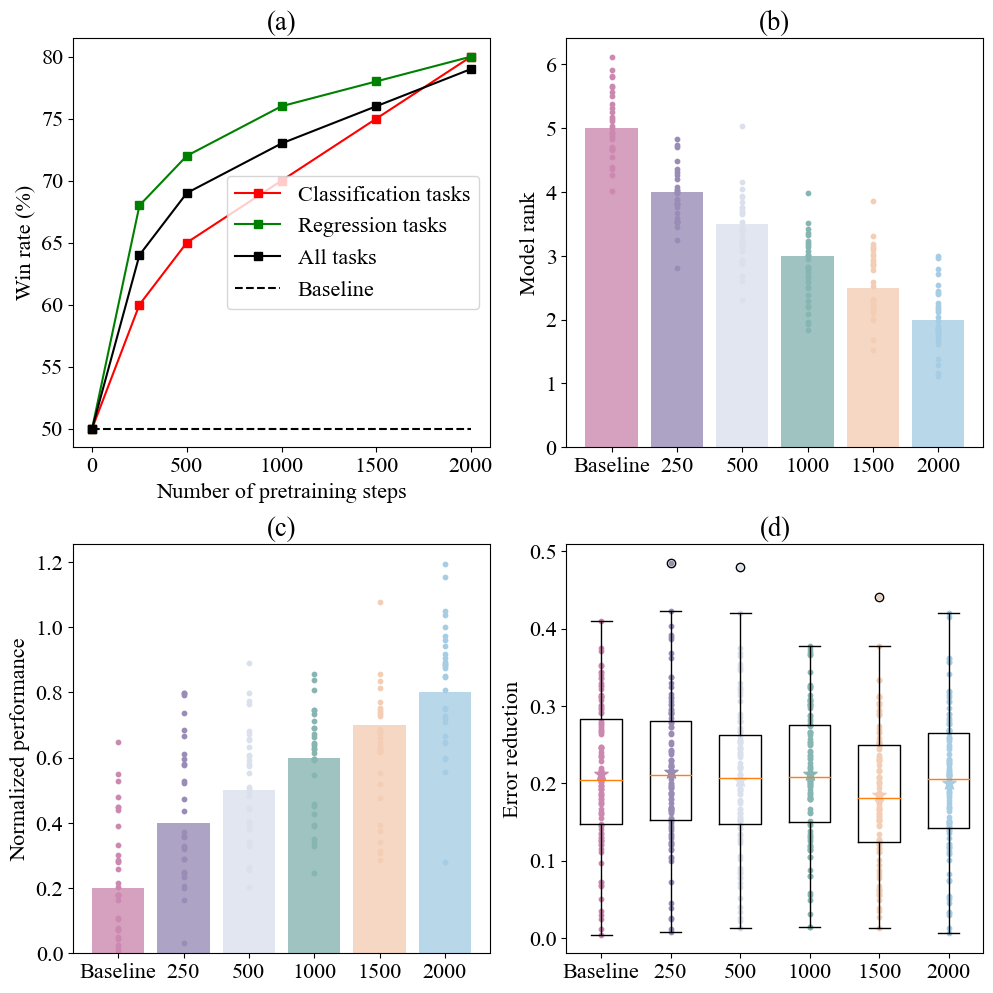

In [7]:
from matplotlib import pyplot as plt, rcParams
import matplotlib.font_manager as fm
import numpy as np
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
config = {
    "font.family": 'serif',  # 衬线字体
    "font.size": 16,  # 相当于小四大小
    "font.serif": ['Times New Roman'],
    "mathtext.fontset": 'stix',  # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False  # 处理负号，即-号
}
rcParams.update(config)

# 为了统一起见+color
fontST = fm.FontProperties(family='SimSun',size=12)
# Data for plots
steps = np.array([0, 250, 500, 1000, 1500, 2000])
classification = np.array([50, 60, 65, 70, 75, 80])
regression = np.array([50, 68, 72, 76, 78, 80])
all_tasks = np.array([50, 64, 69, 73, 76, 79])
baseline = np.array([50, 50, 50, 50, 50, 50])

model_ranks = np.array([5, 4, 3.5, 3, 2.5, 2])
scatter_data_ranks = [np.abs(np.random.normal(loc=rank, scale=0.5, size=30)) for rank in model_ranks]

performance = np.array([0.2, 0.4, 0.5, 0.6, 0.7, 0.8])
scatter_data_performance = [np.abs(np.random.normal(loc=perf, scale=0.2, size=30)) for perf in performance]

error_reduction = [np.abs(np.random.normal(loc=0.2, scale=0.1, size=100)) for _ in range(6)]
means = [np.mean(data) for data in error_reduction]

colors = ["#cc88B0", "#998DB7", "#DBE0ED", "#87B5B2", "#F4CEB4", '#A6CDE4']
# colors = ['#2a5522', '#bf9895', '#e07e35', '#f2cca0', '#a9c4e6', '#D1392B']

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot (a) - Line Plot for Win Rate
axs[0, 0].plot(steps, classification, 'r-', marker='s', label='Classification tasks')
axs[0, 0].plot(steps, regression, 'g-', marker='s', label='Regression tasks')
axs[0, 0].plot(steps, all_tasks, 'k-', marker='s', label='All tasks')
axs[0, 0].plot(steps, baseline, 'k--', label='Baseline')
axs[0, 0].set_xlabel('Number of pretraining steps')
axs[0, 0].set_ylabel('Win rate (%)')
axs[0, 0].legend()
axs[0, 0].set_title('(a)')

# Plot (b) - Bar Plot with Scatter for Model Rank
axs[0, 1].bar(range(len(model_ranks)), model_ranks, color=colors, alpha=0.8)
for i, data in enumerate(scatter_data_ranks):
    axs[0, 1].scatter(np.full(data.shape, i), data, color=colors[i], s=10)
axs[0, 1].set_xticks(range(len(model_ranks)))
axs[0, 1].set_xticklabels(['Baseline', '250', '500', '1000', '1500', '2000'])
axs[0, 1].set_ylabel('Model rank')
axs[0, 1].set_title('(b)')

# Plot (c) - Bar Plot with Scatter for Normalized Performance
axs[1, 0].bar(range(len(performance)), performance, color=colors, alpha=0.8)
for i, data in enumerate(scatter_data_performance):
    axs[1, 0].scatter(np.full(data.shape, i), data, color=colors[i], s=10)
axs[1, 0].set_xticks(range(len(performance)))
axs[1, 0].set_xticklabels(['Baseline', '250', '500', '1000', '1500', '2000'])
axs[1, 0].set_ylabel('Normalized performance')
axs[1, 0].set_title('(c)')

# Plot (d) - Box Plot with Scatter for Error Reduction
axs[1, 1].boxplot(error_reduction, positions=range(6), widths=0.6)
for i, data in enumerate(error_reduction):
    axs[1, 1].scatter(np.full(data.shape, i), data, color=colors[i], s=10)
    axs[1, 1].scatter(i, means[i], color=colors[i], marker='*', s=100)
axs[1, 1].set_xticks(range(6))
axs[1, 1].set_xticklabels(['Baseline', '250', '500', '1000', '1500', '2000'])
axs[1, 1].set_ylabel('Error reduction')
axs[1, 1].set_title('(d)')
fig.tight_layout(pad=0.6)
plt.savefig("a.pdf", dpi=300, bbox_inches='tight')
plt.show()



### tensorboard下载数据为csv，python绘制

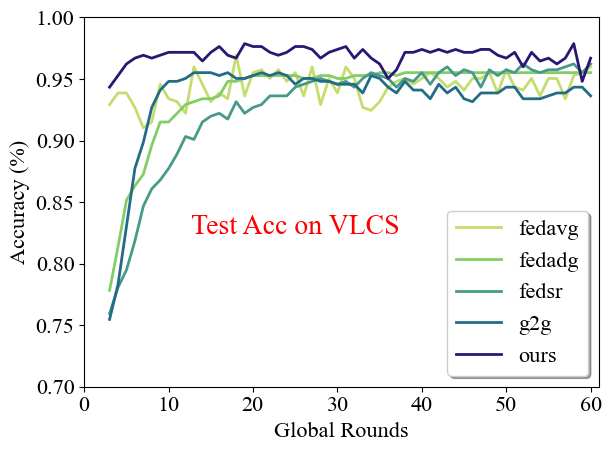

In [34]:
import pandas as pd

paths = [
    'E:\Desktop\\fed_avg-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_adg-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_sr-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_mutual-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_adv-tag-Test-target_3_true.csv'
]

colors = ['#F8EE97', '#C5DD6D', '#82CD66', '#479A88', '#226C87', '#2A1773']

methods = ['fedavg', 'fedadg', 'fedsr', 'g2g', 'ours']

plt.text(25, 0.83, 'Test Acc on VLCS', fontsize=20, color='red', verticalalignment ='center', 
         horizontalalignment ='center',
        #  bbox ={'facecolor':'white', 'pad':10}
        )
for i, path_ in enumerate(paths):
    df = pd.read_csv(path_, header=None, skiprows=1)
    x_data = df.iloc[1:, 1].astype(float)
    y_data = df.iloc[1:, 2].astype(float)
    plt.plot(x_data[1:], y_data[1:], linewidth=2, color=colors[i+1], label=methods[i])
plt.xlim([0,61])
plt.ylim([0.7,1])
plt.xlabel('Global Rounds')
plt.ylabel('Accuracy (%)')
# plt.title('test_acc')
plt.legend(shadow=True)

plt.tight_layout()
plt.grid(False)
# 调整布局使得图像不溢出
plt.savefig('train_loss.svg', format='svg', bbox_inches='tight')

# 显示图形
plt.show()


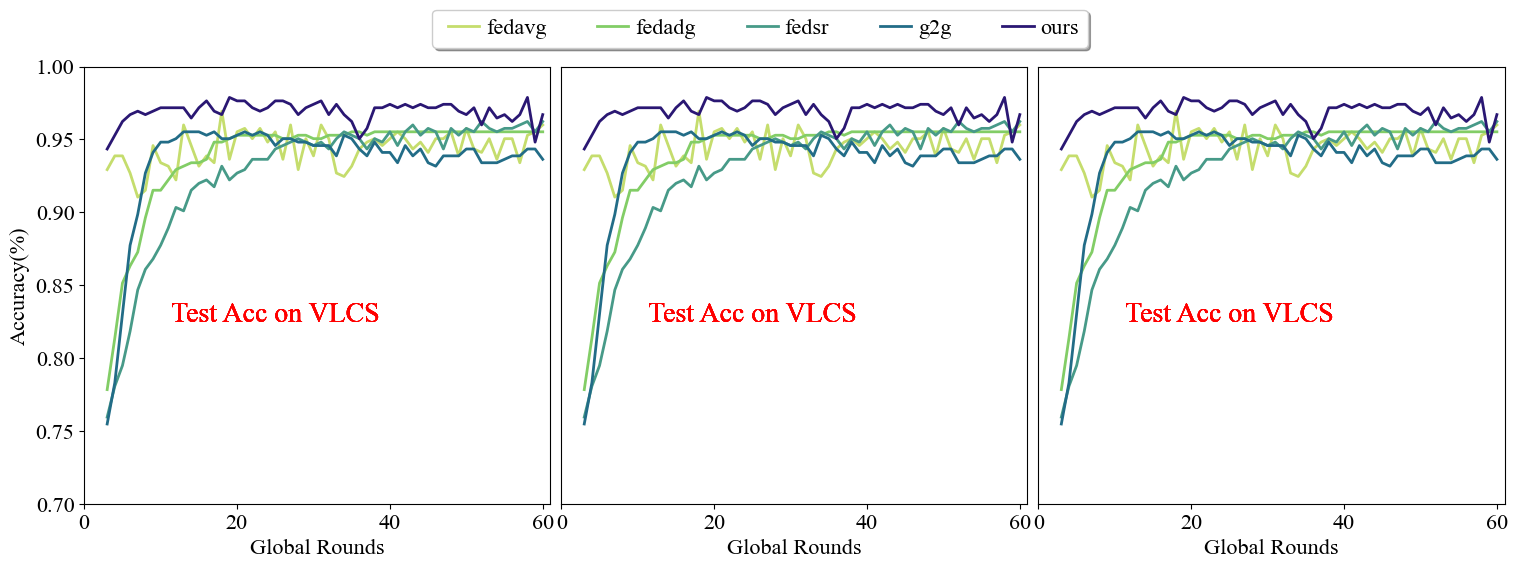

In [42]:
import matplotlib.pyplot as plt
import numpy as np

paths1 = [
    'E:\Desktop\\fed_avg-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_adg-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_sr-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_mutual-tag-Test-target_3_true.csv',
    'E:\Desktop\\fed_adv-tag-Test-target_3_true.csv'
]

colors = ['#F8EE97', '#C5DD6D', '#82CD66', '#479A88', '#226C87', '#2A1773']

methods = ['fedavg', 'fedadg', 'fedsr', 'g2g', 'ours']

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 绘制第一个子图
for i, path_ in enumerate(paths1):
    df = pd.read_csv(path_, header=None, skiprows=1)
    x_data = df.iloc[1:, 1].astype(float)
    y_data = df.iloc[1:, 2].astype(float)
    axs[0].plot(x_data[1:], y_data[1:], linewidth=2, color=colors[i+1], label=methods[i])
    axs[0].text(25, 0.83, 'Test Acc on VLCS', fontsize=20, color='red', verticalalignment ='center', 
         horizontalalignment ='center',
        #  bbox ={'facecolor':'white', 'pad':10}
        )
axs[0].set_xlim([0,61])
axs[0].set_ylim([0.7,1])
axs[0].set_xlabel('Global Rounds')
axs[0].set_ylabel('Accuracy(%)')
# axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].grid(False)

# 绘制第二个子图
for i, path_ in enumerate(paths1):
    df = pd.read_csv(path_, header=None, skiprows=1)
    x_data = df.iloc[1:, 1].astype(float)
    y_data = df.iloc[1:, 2].astype(float)
    axs[1].plot(x_data[1:], y_data[1:], linewidth=2, color=colors[i+1], label=methods[i])
    axs[1].text(25, 0.83, 'Test Acc on VLCS', fontsize=20, color='red', verticalalignment ='center', 
         horizontalalignment ='center',
        #  bbox ={'facecolor':'white', 'pad':10}
        )
axs[1].set_xlim([0,61])
axs[1].set_ylim([0.7,1])
axs[1].set_xlabel('Global Rounds')
axs[1].yaxis.set_visible(False)
# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].grid(False)

# 绘制第三个子图
for i, path_ in enumerate(paths1):
    df = pd.read_csv(path_, header=None, skiprows=1)
    x_data = df.iloc[1:, 1].astype(float)
    y_data = df.iloc[1:, 2].astype(float)
    axs[2].plot(x_data[1:], y_data[1:], linewidth=2, color=colors[i+1], label=methods[i])
    axs[2].text(25, 0.83, 'Test Acc on VLCS', fontsize=20, color='red', verticalalignment ='center', 
         horizontalalignment ='center',
        #  bbox ={'facecolor':'white', 'pad':10}
        )
axs[2].set_xlim([0,61])
axs[2].set_ylim([0.7,1])
axs[2].set_xlabel('Global Rounds')
axs[2].yaxis.set_visible(False)
# axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].grid(False)

# 设置所有子图共用一个图例
lines_labels = [axs[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, 1), numpoints=10, handletextpad=0, labelspacing=0, fancybox=True, shadow=True, ncol=5)
fig.tight_layout(pad=0)
plt.show()
